In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [23]:
df = pd.read_csv("homeprices_banglore.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
X

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [25]:
y

0      39.07
1     120.00
2      62.00
3      75.00
4      51.00
5      38.00
6     135.00
7     155.00
8      50.00
9     167.00
10     82.00
11    140.00
12     38.00
13     40.00
14    101.00
15     42.00
16     48.00
17     60.00
18    102.00
19     32.00
Name: price, dtype: float64

In [26]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [27]:
df.shape[0]

20

In [42]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
# here since it only takes 2d arrray so first we convert df['price'] into numy array using .values and then making n0. of rows 
# equal to that of dataframe i.e df.shape[0] and 1 column
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [43]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [30]:
def BGD(X, y_true ,epochs , Learning_rate = 0.01):
    no_of_features = X.shape[1]
    
    total_samples = X.shape[0]
    w = np.ones(shape=(no_of_features))
    b = 0
    
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_pred = np.dot(w,X.T) + b
        
        w_grad = (-2/total_samples)*X.T.dot(y_true-y_pred)
        b_grad = (-2/total_samples)*np.sum(y_true-y_pred)
        
        w = w - Learning_rate * w_grad
        b = b - Learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_pred))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = BGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost
        


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

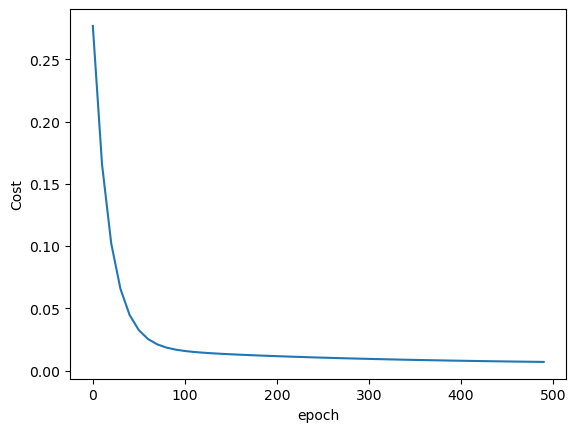

In [31]:
plt.xlabel("epoch")
plt.ylabel("Cost")
plt.plot(epoch_list,cost_list)

In [32]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\manur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [33]:
predict(1000,2,w,b)

C:\Users\manur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [34]:
import math

In [35]:
X.shape[0]

20

In [36]:
X.shape[1]

2

In [37]:
import random
def SGD(X, y_true ,epochs, L = 0.001):
   
    number_of_features = X.shape[1]

    w=np.ones(shape=( number_of_features))
    c=0
    total_samples = X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_pred = np.dot(w,sample_x.T) + c
        
        d_w = (-2/total_samples)*(sample_x.T.dot(sample_y-y_pred))
        d_c = (-2/total_samples)*(sample_y-y_pred)
        
        w = w - L*d_w
        c = c - L*d_c
        
        cost = np.mean(np.square(sample_y-y_pred))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch : {i}")
            print(f"Loss : {cost}")
            
        
    return w , c , cost , cost_list , epoch_list
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

        

Epoch : 0
Loss : 1.0
Epoch : 100
Loss : 0.4273203685672443
Epoch : 200
Loss : 0.10368066864393805
Epoch : 300
Loss : 0.482008736330256
Epoch : 400
Loss : 0.38533767940306946
Epoch : 500
Loss : 0.06132640446537192
Epoch : 600
Loss : 0.05888203808759052
Epoch : 700
Loss : 0.22158378199550724
Epoch : 800
Loss : 0.059476449699325806
Epoch : 900
Loss : 0.1404161326646923
Epoch : 1000
Loss : 0.20583201488514938
Epoch : 1100
Loss : 0.13168471156050215
Epoch : 1200
Loss : 0.1597368766753655
Epoch : 1300
Loss : 0.043638177993025294
Epoch : 1400
Loss : 0.15881025865634454
Epoch : 1500
Loss : 0.2105421432124177
Epoch : 1600
Loss : 0.004514366934649962
Epoch : 1700
Loss : 0.260951719089104
Epoch : 1800
Loss : 0.2737595687460651
Epoch : 1900
Loss : 0.19129325027457086
Epoch : 2000
Loss : 0.03171273263956787
Epoch : 2100
Loss : 0.25438761140415506
Epoch : 2200
Loss : 0.17843453962902853
Epoch : 2300
Loss : 0.28204678328080646
Epoch : 2400
Loss : 0.03221278152765741
Epoch : 2500
Loss : 0.165577258814

(array([0.87017854, 0.84186648]), -0.251260477459569, 0.004557260814650604)

In [38]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [39]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71000291, 0.67800977]), -0.23339545811851323, 0.005018156711413356)

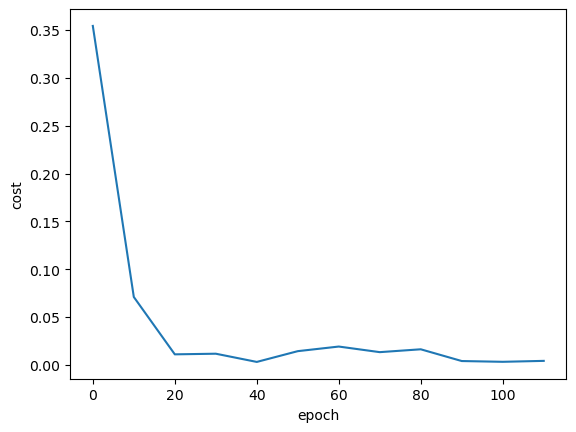

In [164]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)